# Exploring Customer Segmentation


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## Creating Dataframe

In [2]:
df = pd.read_csv('data/telco_churn_data.csv')
pd.options.display.max_columns = None

In [3]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Descriptive Statistics of Numerical Variables

In [5]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


### Descriptive Statistics of Categorical Variables

In [6]:
df.describe(include = object)

,Customer ID,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Gender,Under 30,Senior Citizen,Married,Dependents,City,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869,1869
unique,7043,2,6,2,2,2,4,2,2,2,2,2,2,2,2,3,2,3,2,2,2,2,2,1106,5,20
top,5120-ZBLAI,No,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,Male,No,No,No,No,Los Angeles,Competitor,Competitor had better devices
freq,1,3821,3877,6361,4072,5517,2291,5024,4614,4621,4999,4336,4311,4555,4339,3610,4171,3909,3555,5642,5901,3641,5416,293,841,313


In [8]:
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [9]:
df[df.duplicated()].sum().sum()

0.0

### Review of Exploratory Data Analysis

- I now have a general impression of the data. 

- I understand all of the column names and I concur with their data types.

- I have 7043 observations and 46 features. 

- Of the 46 features, 26 are categorical(object) and 20 are numeric(int64 or float64).

- There are 5174 missing values in features "Churn Category" & "Churn Reason" and 5209 missing values in feature "Customer Satisfaction".

- There are no duplicate entries.

- Statistics appear to be reasonable at the outset. 

- The "City" feature has the most unique values at 1106.

# Data Processing

- I will change all 'Yes' and 'No' to 1/0 so that I may efficiently include more categorical features into my machine learning models.

- I will also change "Female" & "Male" to 1/0 so that I can include this categorical feature into my machine learning models.

- I will also remove features "Churn Category", "Churn Reason", and "Customer Satisfaction" due to all their missing values.

- I will also remove the "Customer ID" feature because the information is unnecessary.

In [10]:
df1 = df.replace('No', 0)
df1 = df1.replace('Yes', 1)
df1 = df1.replace('Female', 1)
df1 = df1.replace('Male', 0)
df1 = df1.drop(['Churn Category', 'Churn Reason', 'Customer Satisfaction', 'Customer ID'], inplace=False, axis=1)
df1

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,0,1,None,0,0.00,0,1,Fiber Optic,9,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,5,0
1,1,1,8,Offer E,1,48.85,1,1,Cable,19,0,1,0,0,0,0,0,0,Month-to-Month,1,Credit Card,83.876,633.30,0.00,120.0,390.80,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,5,0
2,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,57,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,1,0
3,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,13,0,1,1,0,1,1,0,0,Month-to-Month,1,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,1,1
4,1,1,37,Offer C,1,6.33,1,1,Cable,15,0,0,0,0,0,0,0,0,Month-to-Month,1,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,None,1,22.77,0,0,None,0,0,0,0,0,0,0,0,0,Two Year,1,Bank Withdrawal,21.150,1419.40,19.31,0.0,1639.44,1,30,0,0,0,0,0,Landers,92285,34.341737,-116.539416,2182,0,5306,0,0
7039,1,1,24,Offer C,1,36.05,1,1,DSL,24,1,0,1,1,1,1,1,1,One Year,1,Mailed Check,84.800,1990.50,48.23,0.0,865.20,0,38,0,0,1,1,2,Adelanto,92301,34.667815,-117.536183,18980,0,2140,2,0
7040,1,4,72,None,1,29.66,1,1,Cable,59,0,1,1,0,1,1,1,0,One Year,1,Credit Card,103.200,7362.90,45.38,4344.0,2135.52,1,30,0,0,1,1,2,Amboy,92304,34.559882,-115.637164,42,0,5560,2,0
7041,1,1,11,None,0,0.00,0,1,DSL,17,1,0,0,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,29.600,346.45,27.24,0.0,0.00,1,32,0,0,1,1,2,Angelus Oaks,92305,34.167800,-116.864330,301,0,2793,0,0


In [11]:
df1.describe(include=object)

,Offer,Internet Type,Contract,Payment Method,City
count,7043,7043,7043,7043,7043
unique,6,4,3,3,1106
top,None,Fiber Optic,Month-to-Month,Bank Withdrawal,Los Angeles
freq,3877,2291,3610,3909,293


In [12]:
df1= df1.select_dtypes(['int64b', 'float64']).dropna(axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

In [13]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_df1 = scaler.transform(df1)
scaled_df1

array([[-0.91827815, -0.65040855, -1.27898775, ...,  0.87297352,
         2.55963454, -0.42944001],
       [ 1.08899466, -0.31718476, -0.99374288, ...,  0.76223559,
         2.55963454, -0.42944001],
       [-0.91827815, -0.65040855, -0.58625021, ..., -1.03239515,
        -0.23684511, -0.42944001],
       ...,
       [ 1.08899466,  0.6824866 ,  1.61421021, ...,  0.98033014,
         0.4622748 , -0.42944001],
       [ 1.08899466, -0.31718476, -0.87149508, ..., -1.35869165,
        -0.93596502, -0.42944001],
       [-0.91827815, -0.65040855,  1.36971461, ...,  0.58894341,
        -0.23684511,  2.35815996]])

### Review of Data Processing

- I changed all binary categorical features to 0/1, removed features that had too many missing variables or had unnecessary data, and removed the remaining 5 categorical features. 

- I now have 37 numerical features. Due to principal of Euclidean distance, I cannot perform clustering on nominal data. However, I can use prinicple componennt analysis to reduce data dimensionality, extract the data signal, and create more meaningful orthogonal features which should enhance clustering via noise reduction. 

- I have also normalized the data.

## Principle Component Analysis

### Fit & Transformation of Normalized Data From All Features

In [14]:
pca = PCA()
Z = pca.fit_transform(scaled_df1)
Z

array([[-1.95965197, -3.51397607,  2.17102821, ...,  0.40533789,
        -0.03839778,  0.30718599],
       [-0.39825828, -0.8270137 ,  2.57454515, ...,  0.33828387,
        -0.08210322, -0.17737892],
       [ 0.90411294, -2.13391206,  2.06258844, ...,  0.42391627,
        -0.07247322, -0.08890603],
       ...,
       [ 5.87096519,  1.71569182,  1.82066922, ...,  0.45514884,
        -0.08857345,  0.0751437 ],
       [-1.53991097,  1.85588842,  1.39890858, ...,  0.2990407 ,
        -0.12369817,  0.06914997],
       [ 3.30018451, -1.76475694,  0.9787074 , ...,  0.44818062,
        -0.04809833, -0.07871179]])

### Explained Variance Ratios of the 37 Principal Components

In [15]:
print(pca.explained_variance_ratio_)

[0.16940938 0.1030144  0.07946206 0.07006487 0.05661505 0.05332963
 0.03707026 0.03408651 0.03290676 0.02915523 0.02722918 0.02679921
 0.02578033 0.0217801  0.02169496 0.02124416 0.02000085 0.01845434
 0.01802783 0.01744978 0.01660413 0.01490183 0.01472842 0.01244774
 0.01161367 0.00880177 0.0069839  0.00613656 0.00528243 0.00391217
 0.00300409 0.0029188  0.00274208 0.00197509 0.00190592 0.00129212
 0.00117442]


### Principal Component Scree Plot

I created a scree plot to determine how many principal components should be included in my analysis. The elbow was noted at 5, possibly 6. Therefore, I created an "Explained Variance by Component" visual that showed 50% of the variability is explained by 5 components. However, to reach 80% (rule of thumb) required 15 features! This highlights the curse of dimensionality. 

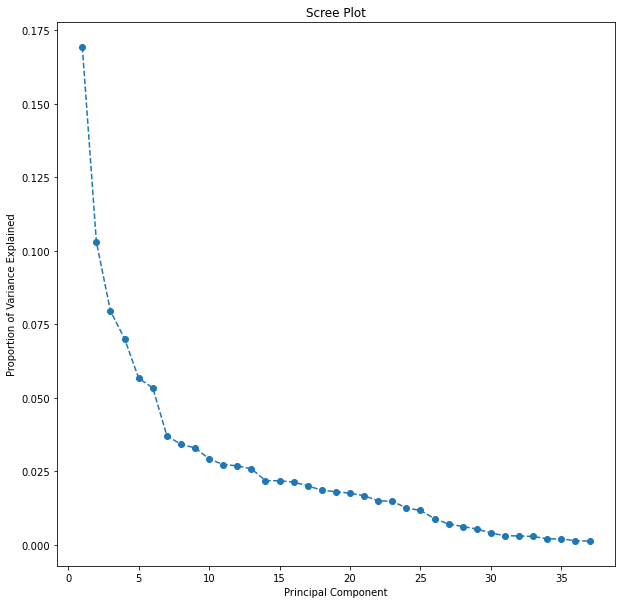

In [16]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10,10))
plt.plot(PC_values, pca.explained_variance_ratio_, marker = 'o', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Explained Variance by Component Chart

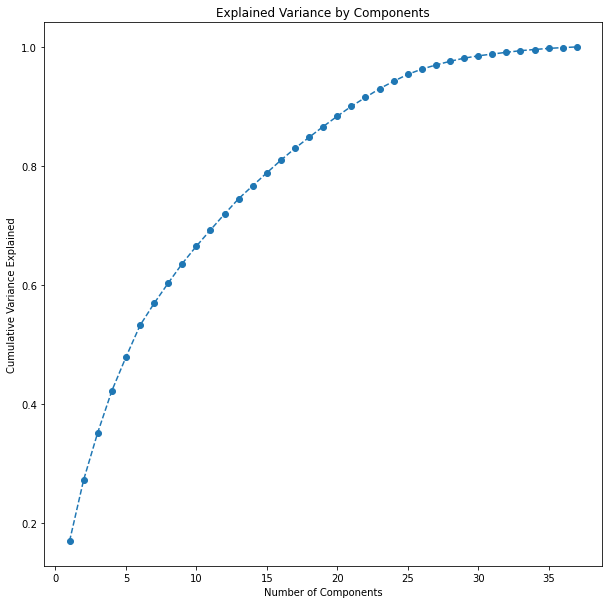

In [19]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10,10))
plt.plot(PC_values, pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

### Mathematical Formula to Confirm Findings of "Explained Variance by Component" Visual

In [20]:
num1 = int((np.cumsum(pca.explained_variance_ratio_) <= .5).sum())
num2 = int((np.cumsum(pca.explained_variance_ratio_) <= .8).sum())
num1, num2

(5, 15)

### Principal Component Analysis of 5 Principal Components

- Here I fitted and transformed only 5 principal components to explain 50% of the variance and created a new dataframe and array containing the pca scores of each sample.

- I also printed the explained variance ratios of the 5 principal components

In [36]:
pca = PCA(n_components = 5)
pca_scores = pca.fit_transform(scaled_df1)
pca_df = pd.DataFrame(data = pca_scores, columns = ['PC 1', 'PC 2', 'PC 3', 'PC4', 'PC5'])
print(pca.explained_variance_ratio_, "\n", pca_df,"\n", pca_scores)

[0.16940938 0.10301437 0.07946163 0.07006433 0.05661218] 
           PC 1      PC 2      PC 3       PC4       PC5
0    -1.959364 -3.513226  2.168263 -0.970627  3.031690
1    -0.397663 -0.827590  2.567991 -2.494622  0.870638
2     0.904331 -2.134227  2.068282 -0.316549  1.868160
3     1.536176 -0.968912  1.832104 -2.178257  2.232184
4    -0.511994 -0.167370  1.997281 -2.281949  2.033933
...        ...       ...       ...       ...       ...
7038 -2.212373  1.125679  1.351067 -0.873055 -2.017232
7039  2.737924  0.589656  1.273034  0.592204  1.167005
7040  5.870421  1.716189  1.830787  0.888045 -1.482373
7041 -1.540310  1.856388  1.408109  1.765552  3.860576
7042  3.299793 -1.764708  0.979711 -0.307247 -1.019598

[7043 rows x 5 columns] 
 [[-1.95936418 -3.51322605  2.16826251 -0.97062715  3.03169018]
 [-0.39766273 -0.82759045  2.5679911  -2.49462249  0.87063819]
 [ 0.9043307  -2.13422662  2.06828219 -0.31654929  1.86816022]
 ...
 [ 5.87042052  1.71618869  1.83078691  0.88804498 -1.4823734

### Prinicple Component Analysis Visualization

- Here I wanted to verify if the principle components started to form clusters when visualized. Therefore, I created a 3d scatterplot of my pca score array and abitrarily colored by Customer Satisfaction feature from the original database.

- When viewed from the top-down angle clusters can be appreciated.

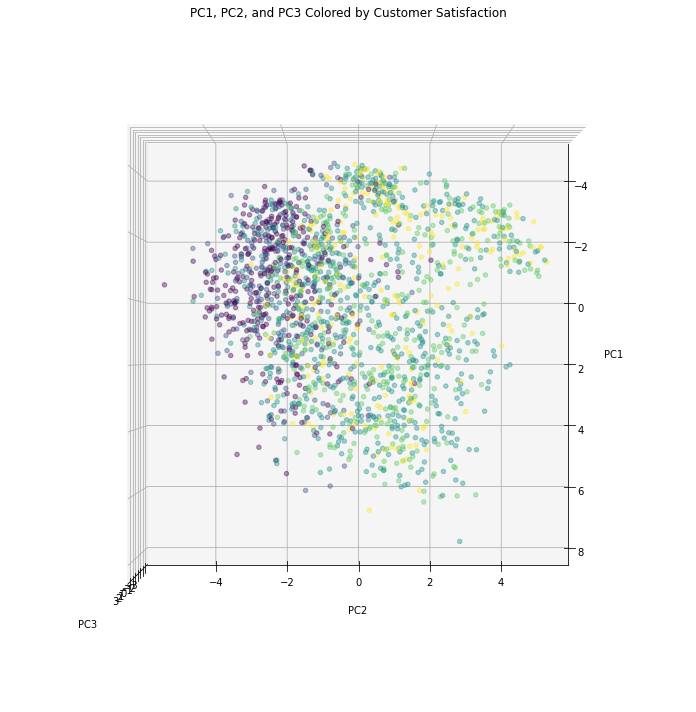

In [41]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(pca_scores[:,0], pca_scores[:,1], pca_scores[:,2], alpha = 0.4, c = df['Customer Satisfaction'])
ax.set_xlabel('PC1', labelpad = 20)
ax.set_ylabel('PC2', labelpad = 20)
ax.set_zlabel('PC3', labelpad = 20)
ax.view_init(90, 0)
plt.title('PC1, PC2, and PC3 Colored by Customer Satisfaction')
plt.tight_layout()

### Principle Component Loading Table

- Below is a table that shows how much each feature loads into each principle component and it assists with analysis and interpretation. 

- Monthly charges, total regular charges, streaming services and tenure in months loaded well into PC1

- Married, dependents, number of dependents, referrals and churn value loaded well into PC2

- Zip code, latitude, and longitude loaded well into PC3

- Age, under 30, senior citizen, average monthly GB downloaded and under 30 loaded well into PC4

- Avg monthly long distance charges, phone service and total long distance charges loaded well into PC5.

In [40]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df1.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Referred a Friend,0.159535,0.302764,0.059878,-0.080281,0.225614
Number of Referrals,0.128421,0.304683,0.048784,-0.060136,0.188185
Tenure in Months,0.267677,0.200235,0.013637,-0.123319,-0.104391
Phone Service,0.020965,0.026189,0.024602,-0.195707,-0.413155
Avg Monthly Long Distance Charges,0.037638,0.035629,0.006295,-0.170584,-0.445027
Multiple Lines,0.191111,-0.042559,0.012636,-0.166211,-0.169602
Internet Service,0.234149,-0.264293,-0.028617,0.099899,0.190769
Avg Monthly GB Download,0.166048,-0.084200,0.015868,0.398974,-0.009967
Online Security,0.190198,0.037995,-0.011701,0.079039,0.065994
Online Backup,0.226294,-0.026710,-0.010513,0.006629,0.046115


## K-Means Clustering with PCA Scores

### Generation of Inertia Values

Here I chose a random range of 1-10 clusters, fitted the k-means algorithm onto the PCA score array, and appended the inertia values into a list.

In [45]:
inertia_values=[]
k = range(1,11)
for i in k:
    pca_kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    pca_kmeans.fit(pca_scores)
    inertia_values.append(pca_kmeans.inertia_)
inertia_values

[124708.9229569661,
 92885.83848437632,
 76543.46501025806,
 68410.61207625507,
 62653.741129797694,
 57677.71986511828,
 53549.18045855825,
 49759.64480564891,
 46527.28729902071,
 44344.20527699441]

### K-means with PCA Clustering Scree Plot

I created a scree plot to determine how many K-mean clusters should be included in my customer segmenation. The elbow was noted at 3.

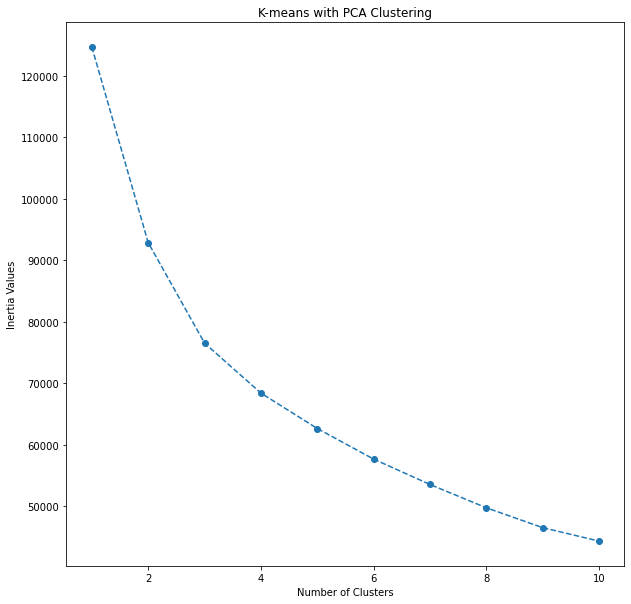

In [46]:
plt.figure(figsize=(10,10))
plt.plot(k,inertia_values, marker = 'o', linestyle = '--')
plt.title("K-means with PCA Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

plt.show()

### K-means Model Fitting onto PCA Scores

In [47]:
pca_kmeans = KMeans(n_clusters = 3, init = 'k-means++', verbose = 1, random_state = 42)
pca_kmeans.fit(pca_scores)

Initialization complete
Iteration 0, inertia 125419.43424482153
Iteration 1, inertia 90419.35516451669
Iteration 2, inertia 80428.74792024694
Iteration 3, inertia 77264.00055940558
Iteration 4, inertia 76683.1486003894
Iteration 5, inertia 76576.69362007604
Iteration 6, inertia 76553.16185825791
Iteration 7, inertia 76547.68911023131
Converged at iteration 7: center shift 0.00035218914839132856 within tolerance 0.00035413580280268647.
Initialization complete
Iteration 0, inertia 127277.21815441124
Iteration 1, inertia 91294.52130108896
Iteration 2, inertia 80869.00488293217
Iteration 3, inertia 77853.08225791313
Iteration 4, inertia 76885.22758242273
Iteration 5, inertia 76632.91089046621
Iteration 6, inertia 76566.31330813823
Iteration 7, inertia 76551.25924855177
Iteration 8, inertia 76547.09752488023
Converged at iteration 8: center shift 0.00029411283979992087 within tolerance 0.00035413580280268647.
Initialization complete
Iteration 0, inertia 118134.72344042144
Iteration 1, inert

KMeans(n_clusters=3, random_state=42, verbose=1)

## Results

### New Results Dataframe

Here I will create new dataframe that includes the previously processed dataframe, five principal component scores, and cluster grouping for each sample.

In [50]:
df_pca_kmeans = pd.concat([df1.reset_index(drop=True), pd.DataFrame(pca_scores)], axis = 1)
df_pca_kmeans.columns.values[-5:] = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df_pca_kmeans['PCA_K-means_Cluster'] = pca_kmeans.labels_
df_pca_kmeans

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,PC1,PC2,PC3,PC4,PC5,PCA_K-means_Cluster
0,0,0,1,0,0.00,0,1,9,0,0,1,0,0,1,0,0,1,41.236,39.65,0.00,0.0,0.00,0,78,0,1,0,0,0,90022,34.023810,-118.156582,68701,1,5433,5,0,-1.959364,-3.513226,2.168263,-0.970627,3.031690,2
1,1,1,8,1,48.85,1,1,19,0,1,0,0,0,0,0,0,1,83.876,633.30,0.00,120.0,390.80,1,74,0,1,1,1,1,90063,34.044271,-118.185237,55668,1,5302,5,0,-0.397663,-0.827590,2.567991,-2.494622,0.870638,2
2,0,0,18,1,11.33,1,1,57,0,0,0,0,1,1,1,1,1,99.268,1752.55,45.61,0.0,203.94,0,71,0,1,0,1,3,90065,34.108833,-118.229715,47534,1,3179,1,0,0.904331,-2.134227,2.068282,-0.316549,1.868160,2
3,1,1,25,1,19.76,0,1,13,0,1,1,0,1,1,0,0,1,102.440,2514.50,13.43,327.0,494.00,1,78,0,1,1,1,1,90303,33.936291,-118.332639,27778,1,5337,1,1,1.536176,-0.968912,1.832104,-2.178257,2.232184,0
4,1,1,37,1,6.33,1,1,15,0,0,0,0,0,0,0,0,1,79.560,2868.15,0.00,430.0,234.21,1,80,0,1,1,1,1,90602,33.972119,-118.020188,26265,1,2793,1,0,-0.511994,-0.167370,1.997281,-2.281949,2.033933,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,22.77,0,0,0,0,0,0,0,0,0,0,0,1,21.150,1419.40,19.31,0.0,1639.44,1,30,0,0,0,0,0,92285,34.341737,-116.539416,2182,0,5306,0,0,-2.212373,1.125679,1.351067,-0.873055,-2.017232,1
7039,1,1,24,1,36.05,1,1,24,1,0,1,1,1,1,1,1,1,84.800,1990.50,48.23,0.0,865.20,0,38,0,0,1,1,2,92301,34.667815,-117.536183,18980,0,2140,2,0,2.737924,0.589656,1.273034,0.592204,1.167005,0
7040,1,4,72,1,29.66,1,1,59,0,1,1,0,1,1,1,0,1,103.200,7362.90,45.38,4344.0,2135.52,1,30,0,0,1,1,2,92304,34.559882,-115.637164,42,0,5560,2,0,5.870421,1.716189,1.830787,0.888045,-1.482373,0
7041,1,1,11,0,0.00,0,1,17,1,0,0,0,0,0,0,1,1,29.600,346.45,27.24,0.0,0.00,1,32,0,0,1,1,2,92305,34.167800,-116.864330,301,0,2793,0,0,-1.540310,1.856388,1.408109,1.765552,3.860576,1


## 3D Visualization of Principal Component Clusters
### 3D Scatterplot View Focused on PC1 & PC 2

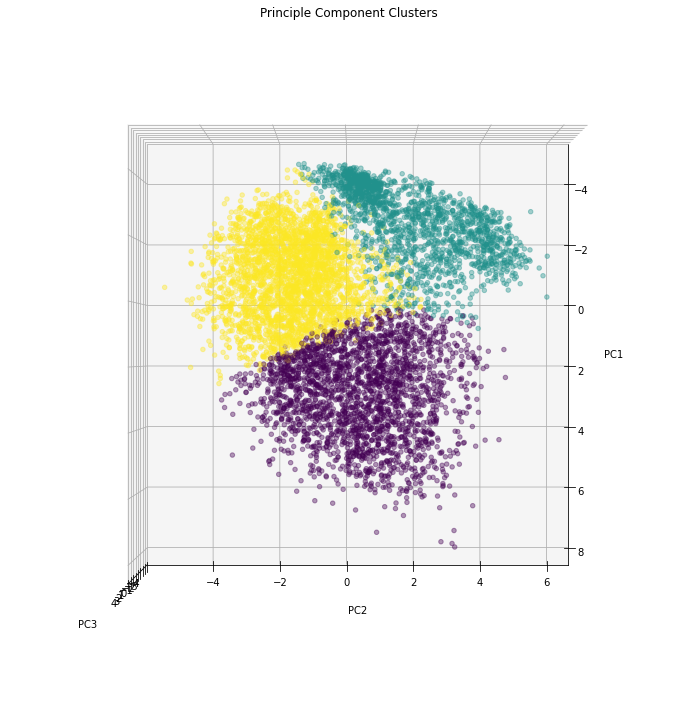

In [52]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pca_kmeans['PC1'], df_pca_kmeans['PC2'], df_pca_kmeans['PC3'], alpha = 0.4, c = df_pca_kmeans['PCA_K-means_Cluster'])
ax.set_xlabel('PC1', labelpad = 20)
ax.set_ylabel('PC2', labelpad = 20)
ax.set_zlabel('PC3', labelpad = 20)
ax.view_init(90, 0)
plt.title('Principle Component Clusters')
plt.tight_layout()

### 3D Scatterplot View Focused on PC1 & PC 3

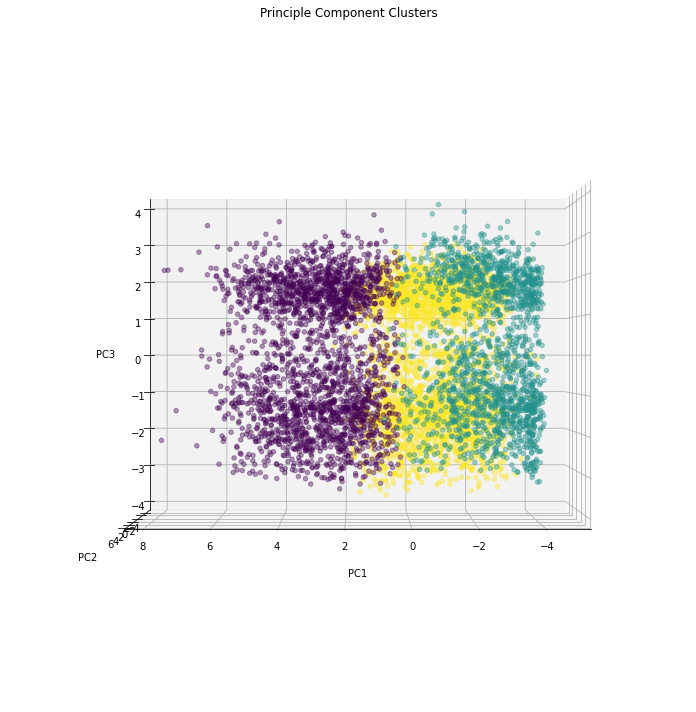

In [59]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pca_kmeans['PC1'], df_pca_kmeans['PC2'], df_pca_kmeans['PC3'], alpha = 0.4, c = df_pca_kmeans['PCA_K-means_Cluster'])
ax.set_xlabel('PC1', labelpad = 20)
ax.set_ylabel('PC2', labelpad = 20)
ax.set_zlabel('PC3', labelpad = 20)
ax.view_init(0, 90)
plt.title('Principle Component Clusters')
plt.tight_layout();

### 3D Scatterplot View Focused on PC2 & PC 3

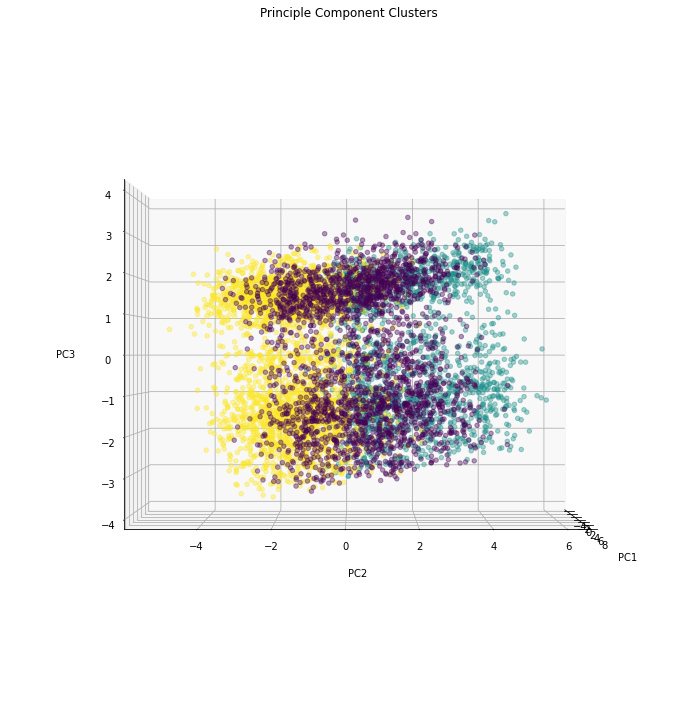

In [61]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pca_kmeans['PC1'], df_pca_kmeans['PC2'], df_pca_kmeans['PC3'], alpha = 0.4, c = df_pca_kmeans['PCA_K-means_Cluster'])
ax.set_xlabel('PC1', labelpad = 20)
ax.set_ylabel('PC2', labelpad = 20)
ax.set_zlabel('PC3', labelpad = 20)
ax.view_init(0, 0)
plt.title('Principle Component Clusters')
plt.tight_layout();

## Interactive 3D Scatterplot of Principal Component Clusters

In [56]:
px.scatter_3d(data_frame=pca_scores, x = 0, y = 1, z = 2, color = df_pca_kmeans['PCA_K-means_Cluster'])

### Review of 3D Visualization of Principal Component Clusters

- What is most interesting of the static 3D scatterplot above is the view that focuses on PC1 and PC2 is the view that yields the most segmenation among the groups.

- This finding is reinforced in the interactive 3D scatterplot when the view focuses on 0 and 1.

## Interpretation & Analysis of Customer Segmentation Per Feature via Seaborn
- Due to the underlying data structures found in the numeric features of type "float64", I made the decision to narrow my interpretation and analysis to numeric features of type "int64".
- The bar plots generated below compare the three main clusters across all of the integer values of each numeric feature with data type "int64". The features with data type "int64" equal 29 in total.

## Characteristics of Each Customer Segment

### Blue Cluster(0): Most Loyal Customer Segment, Highest Utilizer of Services, High Referral Rate, Minimal Customer Service Requirements
- This customer segment is the most likely to have the longest tenure and refer another customer. 
- This customer segment is the most likely to have multiple phone lines, online security, online backup, online protection plan, device protection plan, premium tech support, streaming services.
- This customer segment is most likely to make up the under 30 portion of users, most likely to be married, if they have dependents then it is likely that they have 1, 2, 3 dependents.
- This customer segment is likely to have a customer service request or product service issue reported.
- This customer segment isn't likely to churn.
### Business Recommendations:
- This customer segment is the most likely to refer another customer. Therefore, they should be better incentivized due to do so - to further increase market share.
- These customers are the most loyal. Therefore, they should be rewarded with a gift certificate for their business or no intervention is necessary because it is likely they will remain customers. 
- This customer segment should be targeted for customer surveys to serve as a baseline against other customer segments who have high churn rates.
- This customer segment should be targeted for company credit cards that offer higher rewards for the services they purchase.

### Orange Cluster(1): Loyal Customer Segment, Lowest Utilizer of Services, Lowest Customer Service Requirements
- This customer segment is the least likely to have internet service, to download GB of data, have an online protection plan, have unlimited data, or have paperless billing.
- This customer segment is least likely to be a senior citizen or under 30; if this customer segment has dependents then they are likely to have 1, 2, or 3 dependents; this customer segment is also likely to be married.
- This customer segment is least likely to have a customer service request and isn't likely to churn.

### Business Recommendations:
- This customer has the lowest utilization of services. Therefore, they may respond positively to reasonably priced packages to increase their service utilization.


### Green Cluster(2): Unloyal Customer Segment, Focus on Internet/Phone Service, Value-Focused, High Customer Service Requirements
- This customer segment is most likely to have the shortest tenure.
- This customer segment is the most likely to have phone service, internet service and paperless billing.
- This customer segment is the least likely to have online security, online backup, device protection plan, premium tech support or multiple phone lines.
- This customer segment is significantly more likely to make up the senior citizen portion of the age distribution and the least likely to have dependents.
- This customer segment is the most likely to have customer service requests of 2 or more, report product/service issues, and has the highest frequency of churning.
### Business Recommendations:
- This customer has the highest rate of churning. Therefore, contracts could help retain their business that have obvious savings to promote their business. 
- Any calls to customer service should be answered quickly and issues resolved efficiently to maintain their business.
- This customer segment should also be targeted for customer surveys to assess for any areas of improvement.

<ipython-input-63-330168ab6fc8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



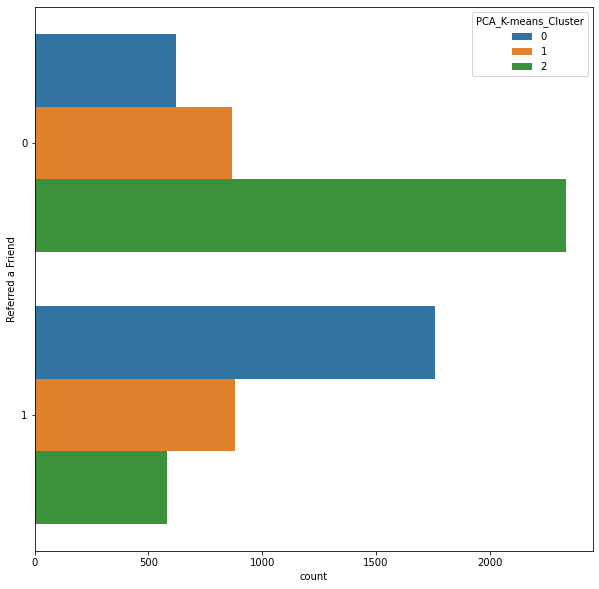

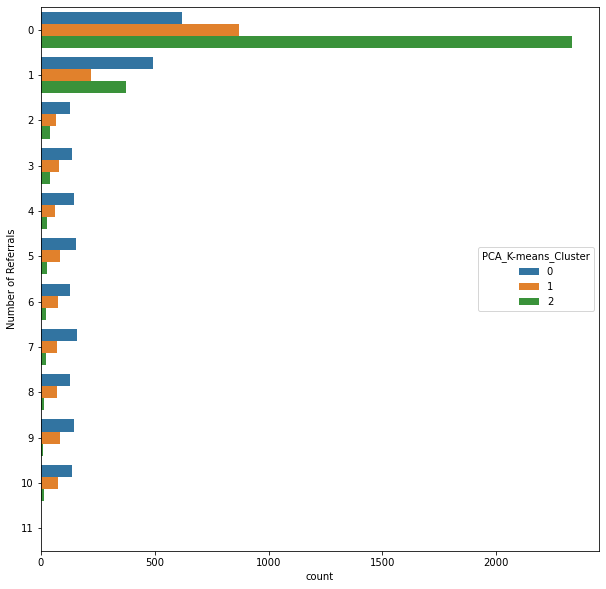

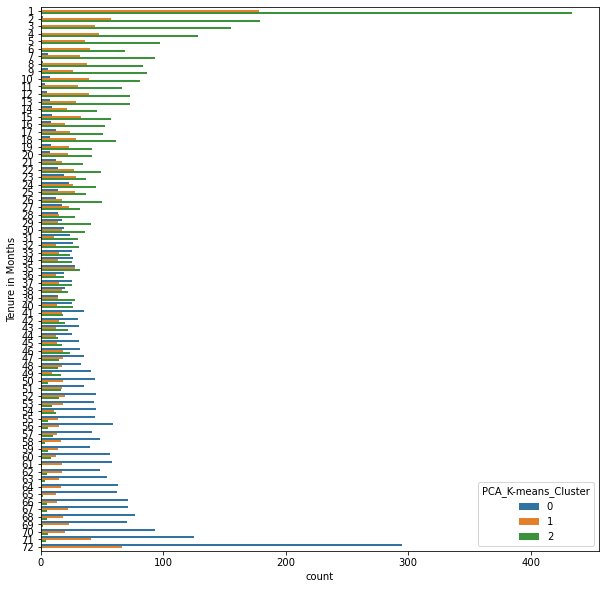

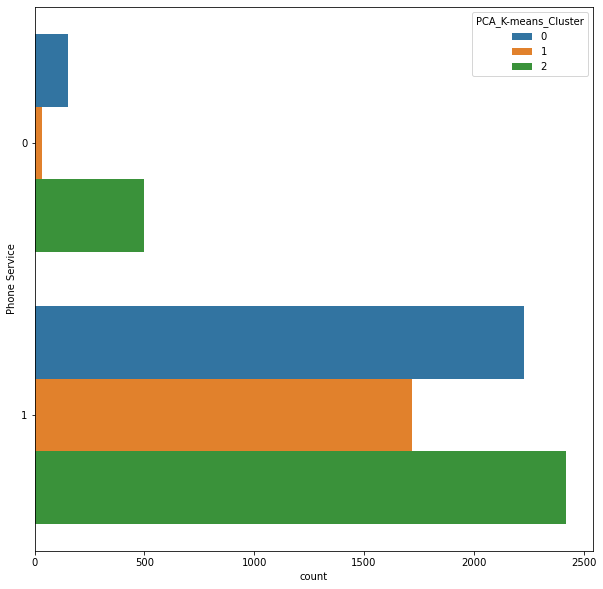

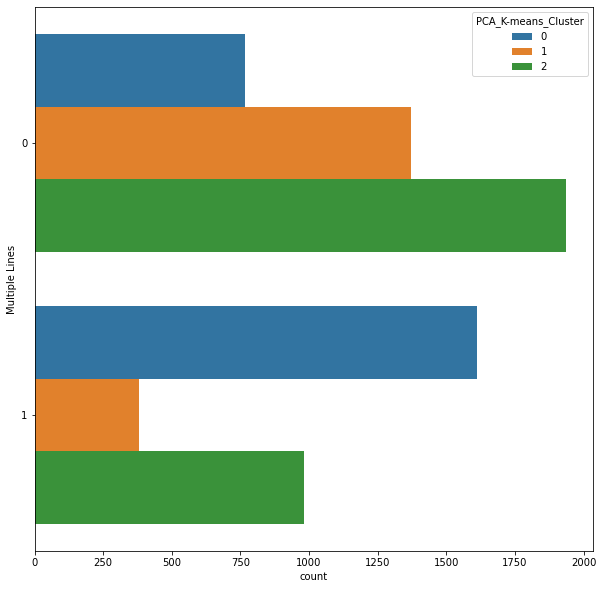

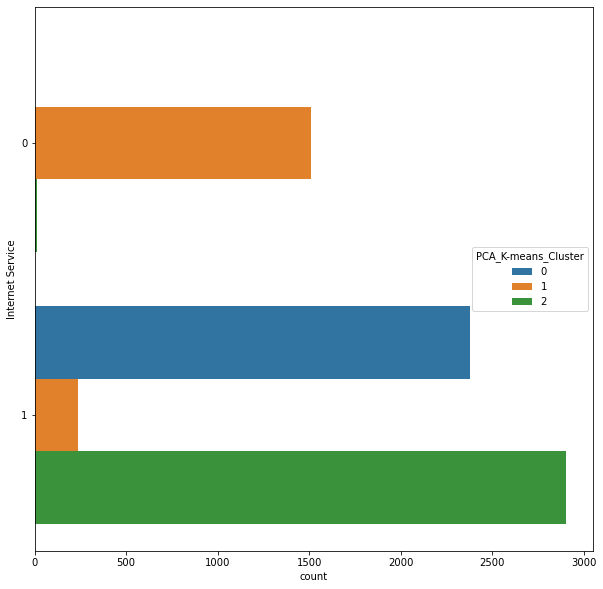

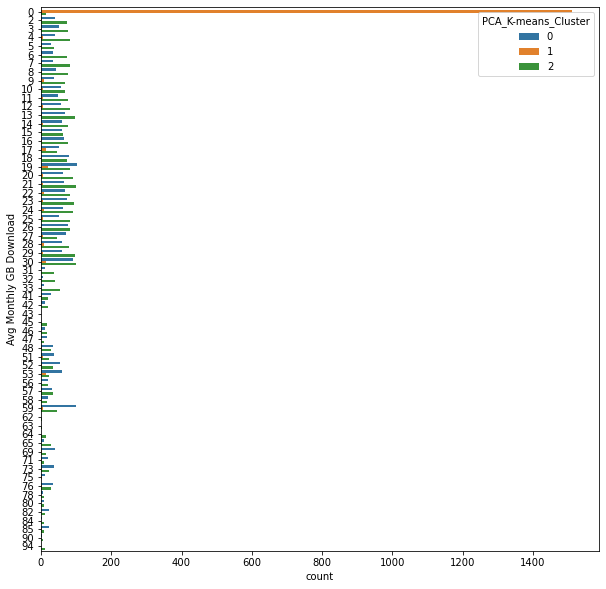

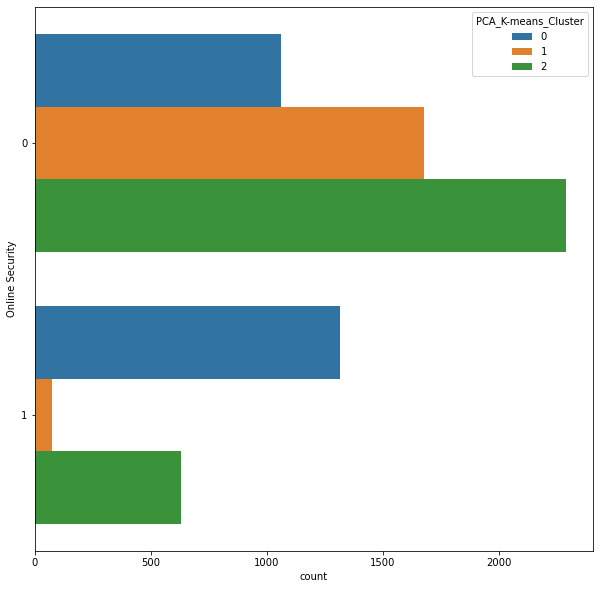

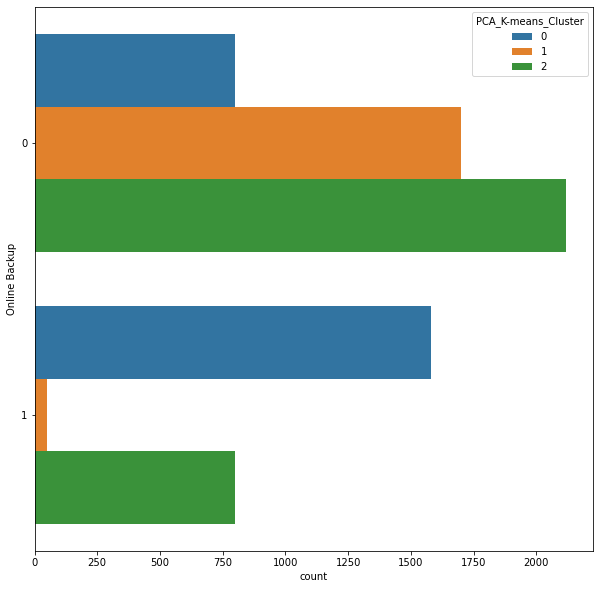

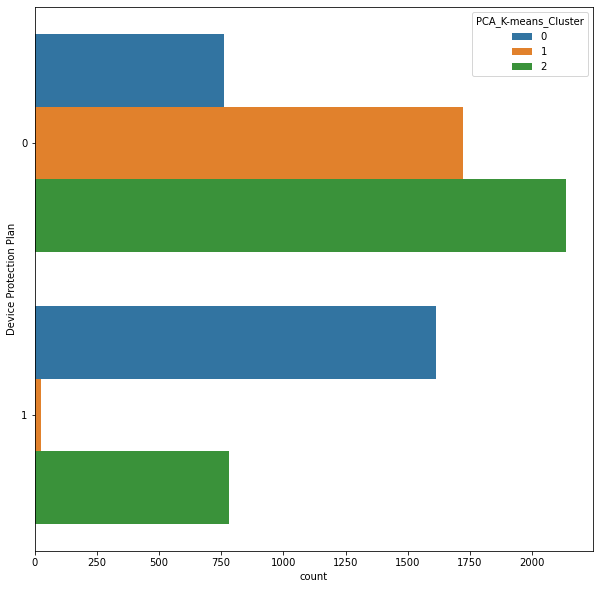

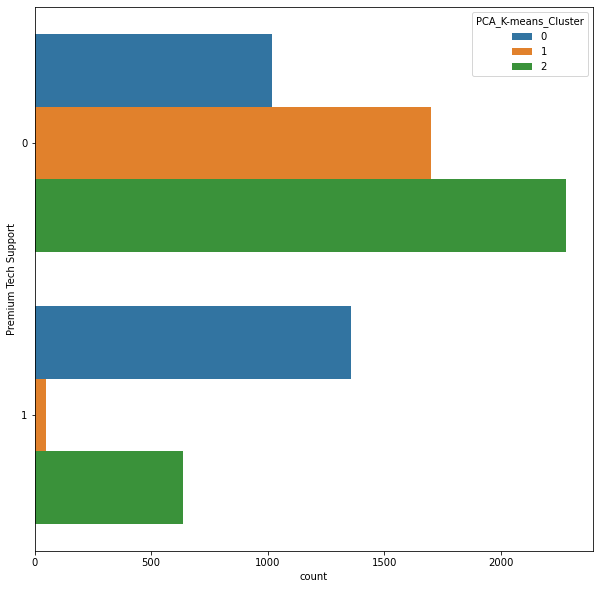

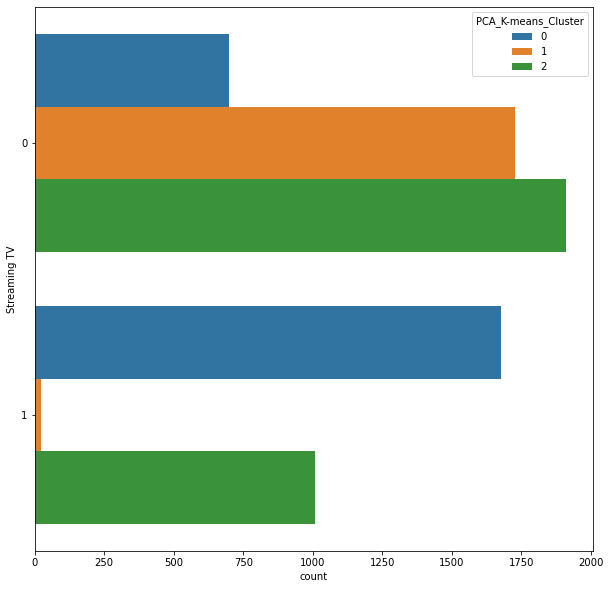

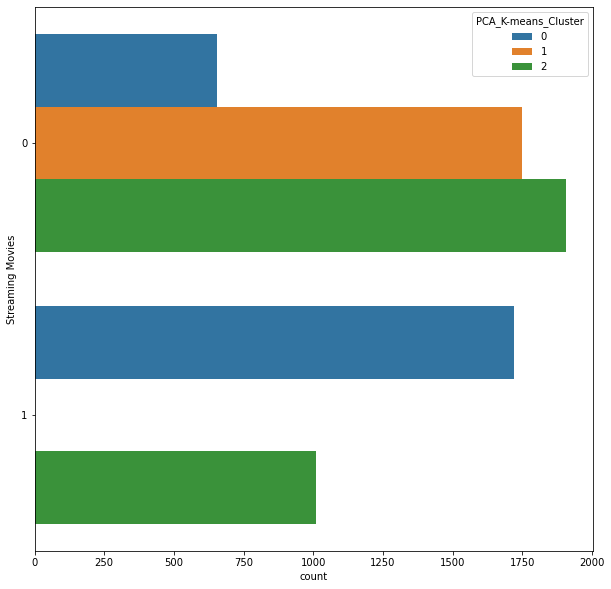

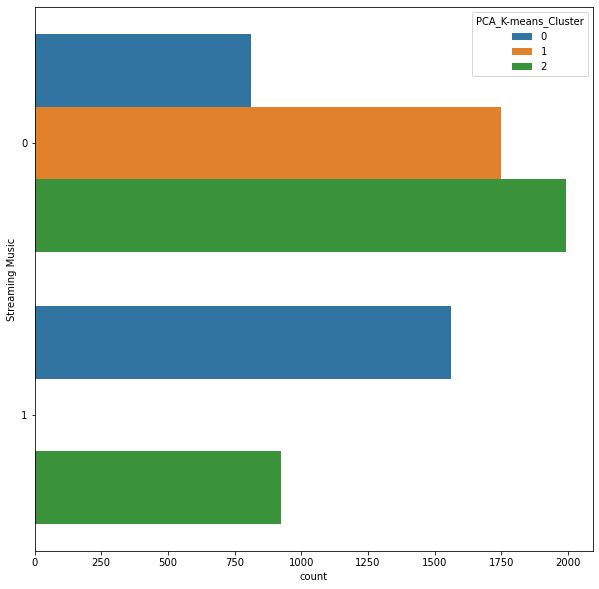

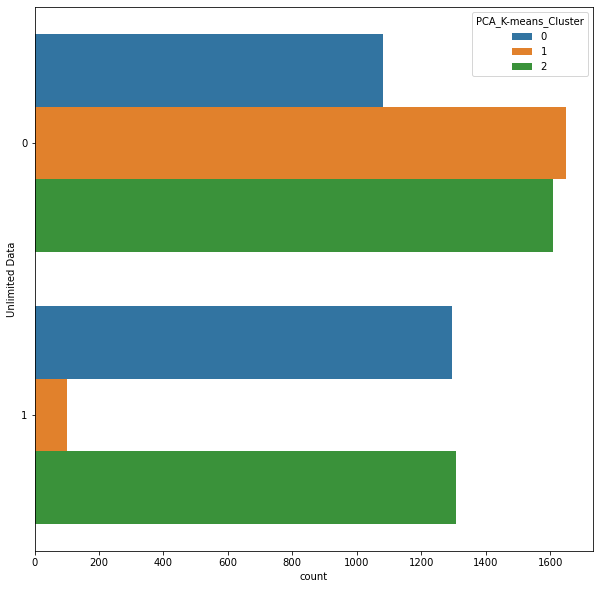

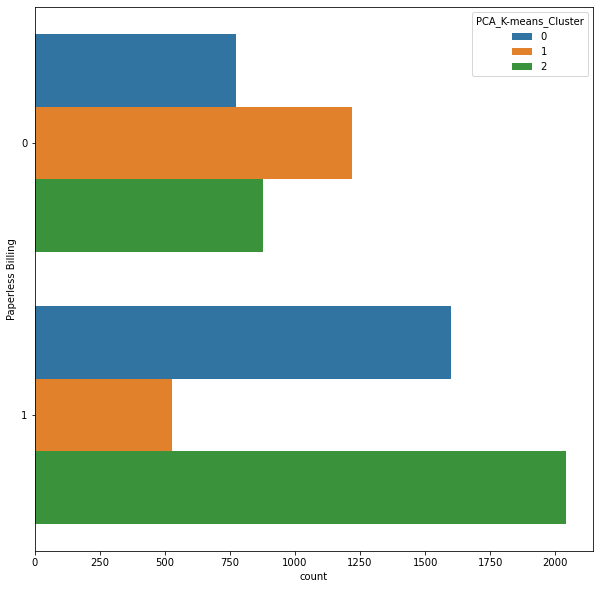

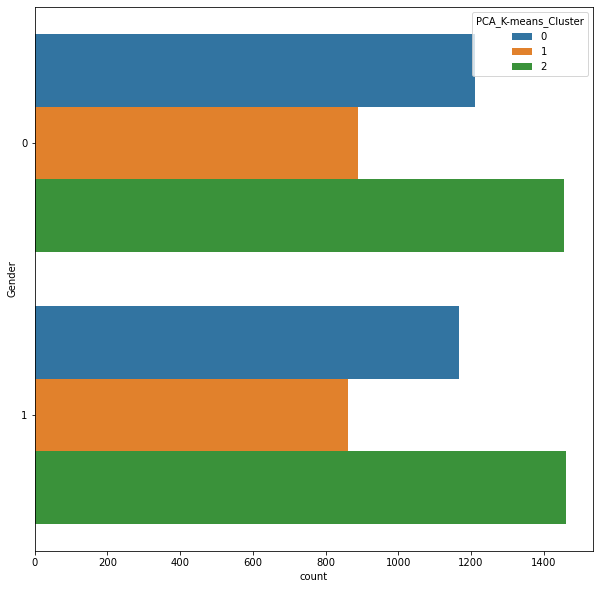

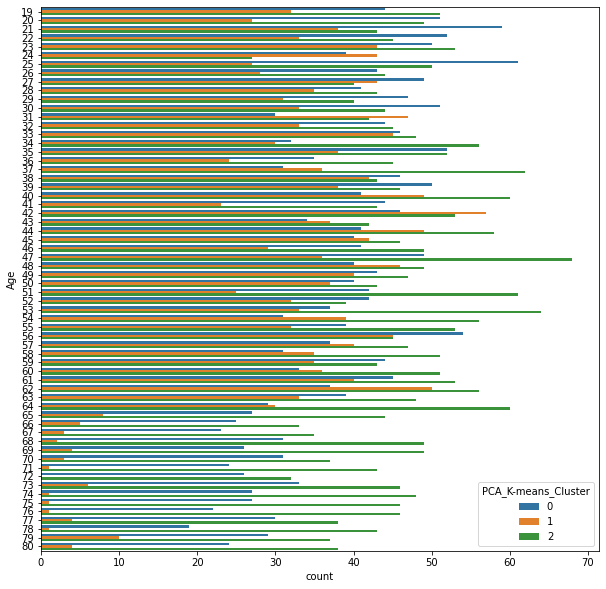

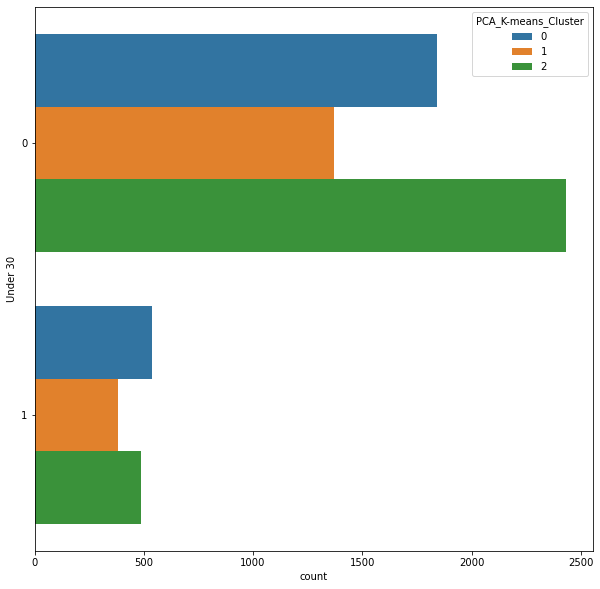

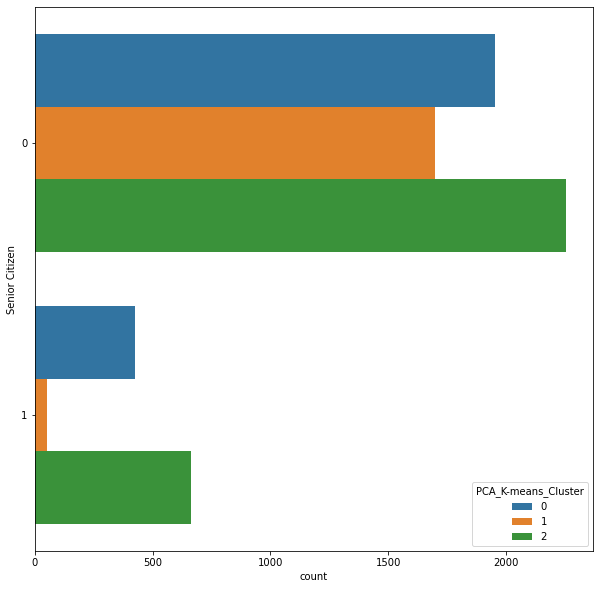

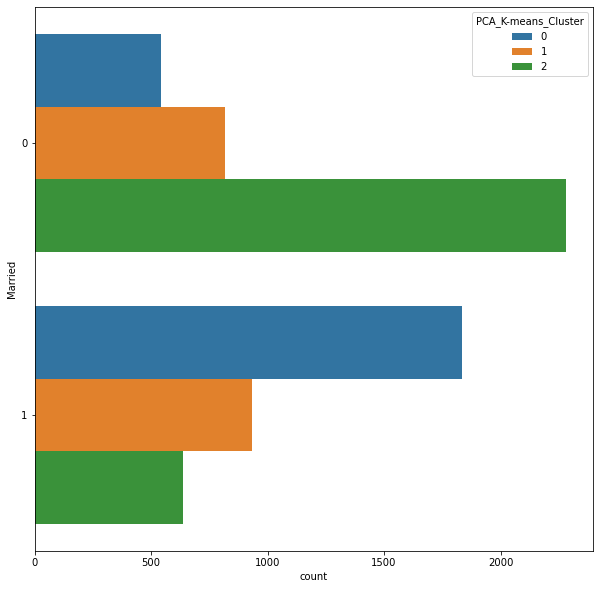

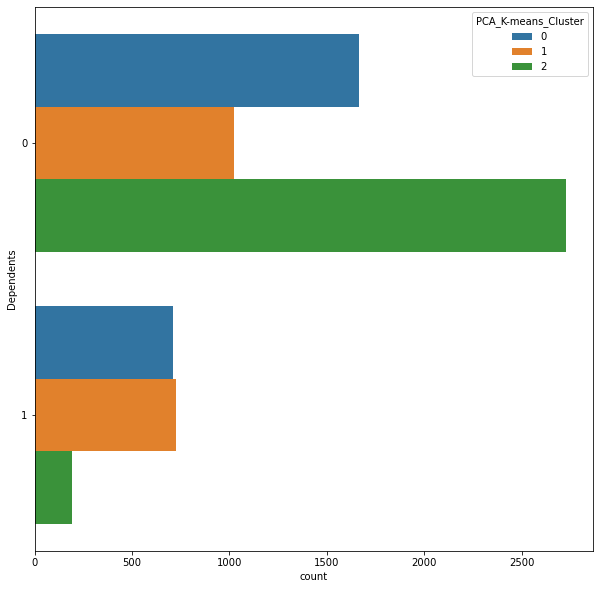

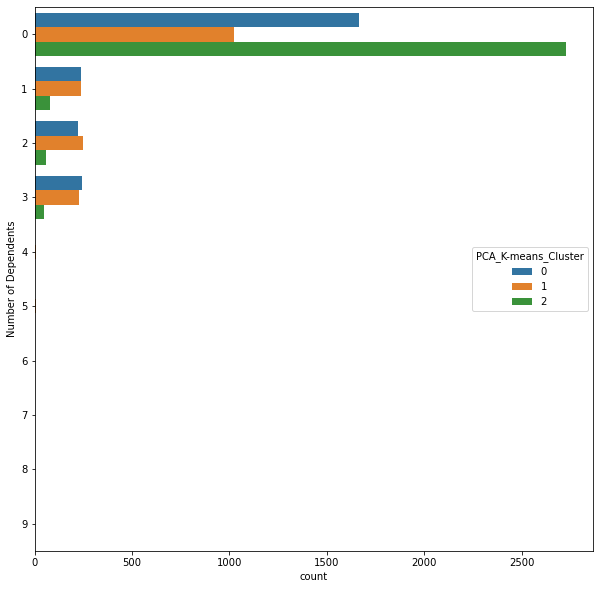

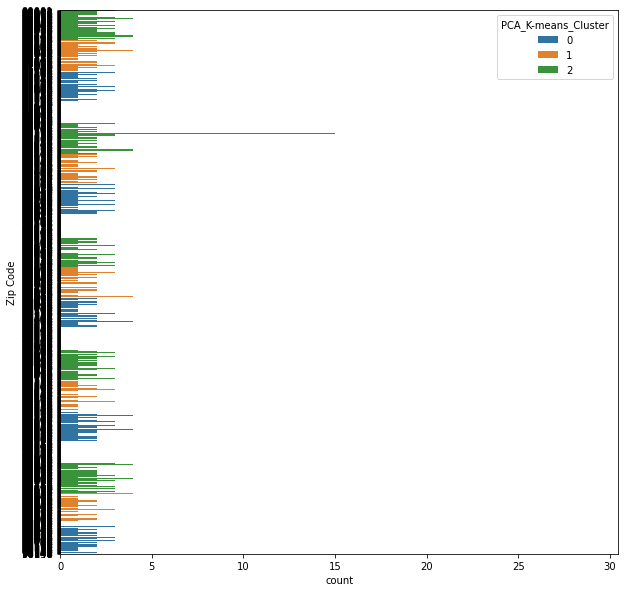

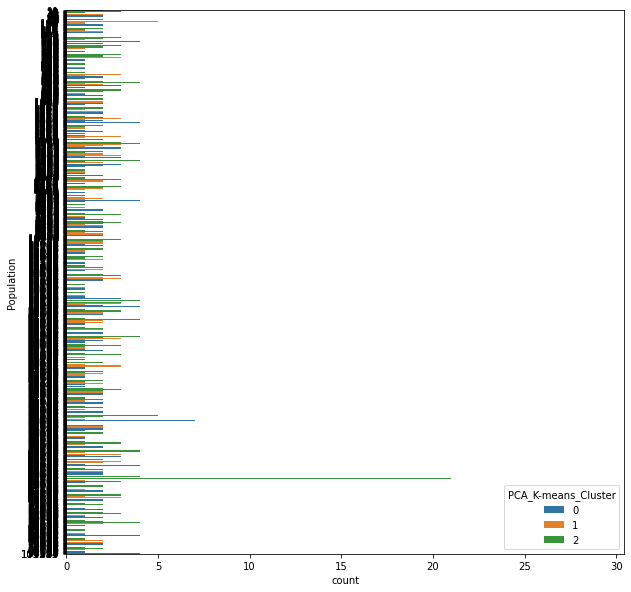

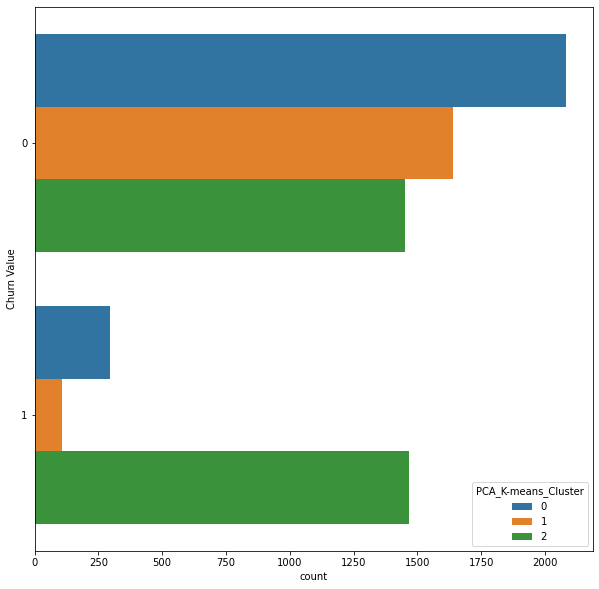

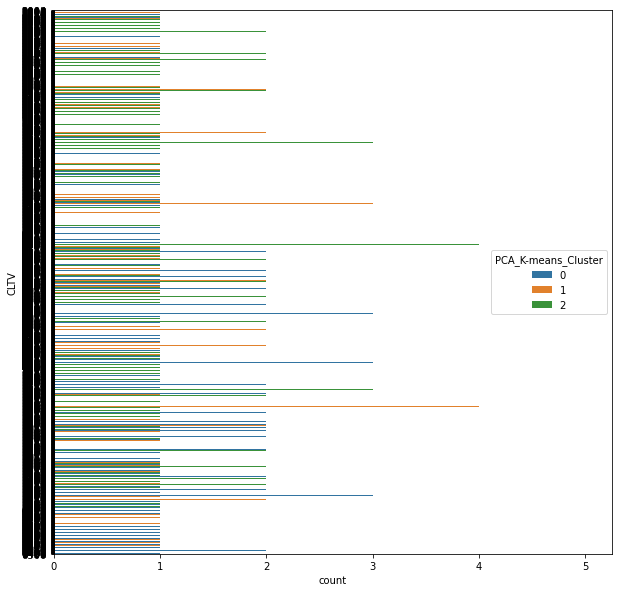

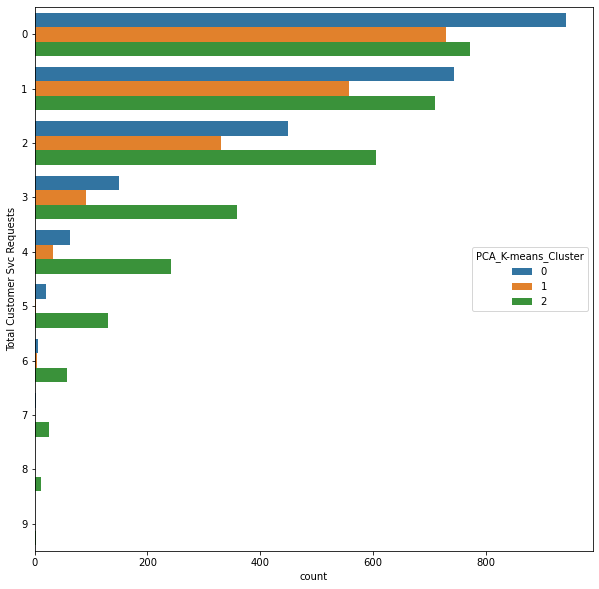

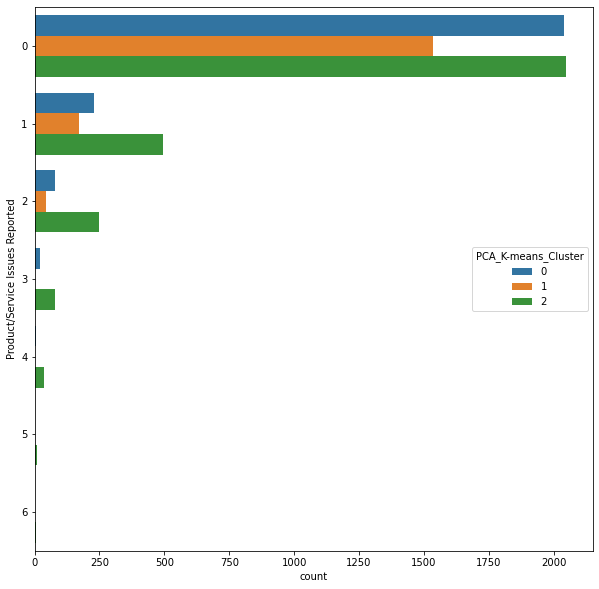

In [63]:
for col in df1.select_dtypes(include='int64').columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data=df1, y=col, hue=df_pca_kmeans['PCA_K-means_Cluster'])